In [8]:
#documentation https://www.alphavantage.co/documentation/
#API of SPY Data which is an ETF that tracks the S&P 500
import requests  
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=KU0Z8259JAVSYO4P'
response = requests.get(url) 
response.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SPY',
  '3. Last Refreshed': '2020-05-12',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-05-12': {'1. open': '293.7900',
   '2. high': '294.2400',
   '3. low': '286.5200',
   '4. close': '286.6700',
   '5. volume': '87356886'},
  '2020-05-11': {'1. open': '290.3400',
   '2. high': '294.0000',
   '3. low': '289.8800',
   '4. close': '292.5000',
   '5. volume': '78982891'},
  '2020-05-08': {'1. open': '291.0900',
   '2. high': '292.9500',
   '3. low': '289.8600',
   '4. close': '292.4400',
   '5. volume': '76446082'},
  '2020-05-07': {'1. open': '287.7500',
   '2. high': '289.7800',
   '3. low': '287.1300',
   '4. close': '287.6800',
   '5. volume': '74788296'},
  '2020-05-06': {'1. open': '288.0400',
   '2. high': '288.4600',
   '3. low': '283.7800',
   '4. close': '284.2500',
   '5. volume': '72980387'},
  '2020-05-05': {'1. open': '28

In [9]:
# opening a file to save the SPY data to 
import pickle
with open('SPYDATA','wb') as f:
    pickle.dump(response,f)

In [10]:
#open spydata file that saved above 
with open('SPYDATA','rb') as f:
    response = pickle.load(f)

In [11]:
#import stockdata into a data frame
import pandas as pd
stockdata = pd.DataFrame(response.json()['Time Series (Daily)']).transpose()

In [12]:
#to view data frame 
stockdata.head()

,1. open,2. high,3. low,4. close,5. volume
2020-05-12,293.7900,294.2400,286.5200,286.6700,87356886
2020-05-11,290.3400,294.0000,289.8800,292.5000,78982891
2020-05-08,291.0900,292.9500,289.8600,292.4400,76446082
2020-05-07,287.7500,289.7800,287.1300,287.6800,74788296
2020-05-06,288.0400,288.4600,283.7800,284.2500,72980387


In [13]:
#to see what the data type is (data is not numerical it is an object)
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 2020-05-12 to 2000-05-11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    5032 non-null   object
 1   2. high    5032 non-null   object
 2   3. low     5032 non-null   object
 3   4. close   5032 non-null   object
 4   5. volume  5032 non-null   object
dtypes: object(5)
memory usage: 235.9+ KB


In [14]:
#to change to numeric use the to_numeric function and specify each column
stockdata['1. open'] = pd.to_numeric(stockdata['1. open'])
stockdata['2. high'] = pd.to_numeric(stockdata['2. high'])
stockdata['3. low'] = pd.to_numeric(stockdata['3. low'])
stockdata['4. close'] = pd.to_numeric(stockdata['4. close'])
stockdata['5. volume'] = pd.to_numeric(stockdata['5. volume'])

In [15]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 2020-05-12 to 2000-05-11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5032 non-null   float64
 1   2. high    5032 non-null   float64
 2   3. low     5032 non-null   float64
 3   4. close   5032 non-null   float64
 4   5. volume  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9+ KB


In [16]:
#move the date index to a column
stockdata = stockdata.reset_index()

In [17]:
stockdata.head() #check if it was seperated 

,index,1. open,2. high,3. low,4. close,5. volume
0,2020-05-12,293.79,294.24,286.52,286.67,87356886
1,2020-05-11,290.34,294.00,289.88,292.50,78982891
2,2020-05-08,291.09,292.95,289.86,292.44,76446082
3,2020-05-07,287.75,289.78,287.13,287.68,74788296
4,2020-05-06,288.04,288.46,283.78,284.25,72980387


In [18]:
#change the index name to date
stockdata = stockdata.rename(columns = {'index':'DATE'})

In [19]:
#make the date into date data
stockdata['DATE'] = pd.to_datetime(stockdata['DATE'])

In [20]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       5032 non-null   datetime64[ns]
 1   1. open    5032 non-null   float64       
 2   2. high    5032 non-null   float64       
 3   3. low     5032 non-null   float64       
 4   4. close   5032 non-null   float64       
 5   5. volume  5032 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 236.0 KB


In [21]:
#load the weatherdata
weather = pd.read_csv('weatherdata.csv')

In [22]:
#to view what the data looks like 
weather.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-01,1.5,2355.0,2359.0,0.8,0.0,0.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-02,5.6,2349.0,2349.0,0.5,5.0,0.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-03,6.4,1254.0,1055.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-04,4.8,249.0,1722.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-05,4.4,2206.0,1047.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  12549 non-null  object 
 1   NAME     12549 non-null  object 
 2   DATE     12549 non-null  object 
 3   AWND     7362 non-null   float64
 4   FMTM     1337 non-null   float64
 5   PGTM     1311 non-null   float64
 6   PRCP     12519 non-null  float64
 7   SNOW     5949 non-null   float64
 8   SNWD     5874 non-null   float64
 9   TAVG     6330 non-null   float64
 10  TMAX     10660 non-null  float64
 11  TMIN     10445 non-null  float64
 12  TSUN     1 non-null      float64
 13  WDF2     7374 non-null   float64
 14  WDF5     7249 non-null   float64
 15  WESD     365 non-null    float64
 16  WSF2     7376 non-null   float64
 17  WSF5     7249 non-null   float64
 18  WT01     2547 non-null   float64
 19  WT02     324 non-null    float64
 20  WT03     95 non-null     float64
 21  WT04     5 n

In [24]:
#change the date to a date format 
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [25]:
#check if it is in a date format
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  12549 non-null  object        
 1   NAME     12549 non-null  object        
 2   DATE     12549 non-null  datetime64[ns]
 3   AWND     7362 non-null   float64       
 4   FMTM     1337 non-null   float64       
 5   PGTM     1311 non-null   float64       
 6   PRCP     12519 non-null  float64       
 7   SNOW     5949 non-null   float64       
 8   SNWD     5874 non-null   float64       
 9   TAVG     6330 non-null   float64       
 10  TMAX     10660 non-null  float64       
 11  TMIN     10445 non-null  float64       
 12  TSUN     1 non-null      float64       
 13  WDF2     7374 non-null   float64       
 14  WDF5     7249 non-null   float64       
 15  WESD     365 non-null    float64       
 16  WSF2     7376 non-null   float64       
 17  WSF5     7249 non-null   float6

In [26]:
#want to combine the dates together to see on a given date what is the weather for that stock price
mergedata = weather.merge(stockdata, on = 'DATE')

In [27]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 0 to 8642
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    8643 non-null   object        
 1   NAME       8643 non-null   object        
 2   DATE       8643 non-null   datetime64[ns]
 3   AWND       5078 non-null   float64       
 4   FMTM       924 non-null    float64       
 5   PGTM       907 non-null    float64       
 6   PRCP       8619 non-null   float64       
 7   SNOW       4097 non-null   float64       
 8   SNWD       4038 non-null   float64       
 9   TAVG       4364 non-null   float64       
 10  TMAX       7335 non-null   float64       
 11  TMIN       7213 non-null   float64       
 12  TSUN       1 non-null      float64       
 13  WDF2       5086 non-null   float64       
 14  WDF5       5000 non-null   float64       
 15  WESD       252 non-null    float64       
 16  WSF2       5087 non-null   float64       


In [28]:
mergedata['NAME'].unique() #to better understand what weather data is in the file 

array(['NY CITY CENTRAL PARK, NY US',
       'LOS ANGELES INTERNATIONAL AIRPORT, CA US', 'HEATHROW, UK',
       'TORONTO LESTER B. PEARSON INT, ON CA'], dtype=object)

In [29]:
mergedata.corr() #want to see if their is a correlation with the SPY ETF and any of the parameters 

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,...,WT17,WT18,WT19,WT21,WT22,1. open,2. high,3. low,4. close,5. volume
AWND,1.000000,-0.020311,0.006323,0.063069,0.151631,0.116053,-0.002425,-0.271431,-0.175218,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.017949,-0.017475,-0.017998,-0.017611,0.004493
FMTM,-0.020311,1.000000,0.678366,-0.039313,0.029313,-0.031329,NaN,0.075674,0.100367,NaN,...,NaN,NaN,NaN,NaN,NaN,0.201815,0.204750,0.196289,0.199627,-0.027849
PGTM,0.006323,0.678366,1.000000,0.011154,0.091558,0.029966,0.019022,0.072808,0.070729,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.029457,-0.029214,-0.029556,-0.029483,0.044182
PRCP,0.063069,-0.039313,0.011154,1.000000,0.229892,0.021768,-0.129900,-0.070090,-0.011916,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.006598,-0.005985,-0.006714,-0.006013,0.028376
SNOW,0.151631,0.029313,0.091558,0.229892,1.000000,0.268859,NaN,-0.204718,-0.192521,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.046469,-0.046589,-0.046381,-0.046278,0.001044
SNWD,0.116053,-0.031329,0.029966,0.021768,0.268859,1.000000,-0.658967,-0.317254,-0.317074,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.092249,-0.092674,-0.091514,-0.091890,-0.019041
TAVG,-0.002425,NaN,0.019022,-0.129900,NaN,-0.658967,1.000000,0.953628,0.949914,NaN,...,NaN,NaN,NaN,NaN,NaN,0.173734,0.171998,0.174970,0.173314,-0.147801
TMAX,-0.271431,0.075674,0.072808,-0.070090,-0.204718,-0.317254,0.953628,1.000000,0.925358,NaN,...,NaN,NaN,NaN,NaN,NaN,0.107315,0.106809,0.107335,0.106822,-0.030457
TMIN,-0.175218,0.100367,0.070729,-0.011916,-0.192521,-0.317074,0.949914,0.925358,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.099230,0.098593,0.099396,0.098711,-0.034268
TSUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation analysis shows that volume and total average temperature could be inversley correlated and total open,high,low and close all have a postive correlation. This analysis is looking at all the weather data for New York, LA, Toronto and London. 

Next is to see if their is a correlation by city to the SPY.

In [30]:
datasetone = mergedata[['DATE', 'NAME','TMAX', 'PRCP','SNOW','1. open','4. close','5. volume']]

In [31]:
newyorkdata = datasetone[datasetone['NAME'] == 'NY CITY CENTRAL PARK, NY US']

In [32]:
newyorkdata['change'] = (newyorkdata['4. close']- newyorkdata['1. open'])/newyorkdata['1. open']

C:\Users\harri\anaconda3.00\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


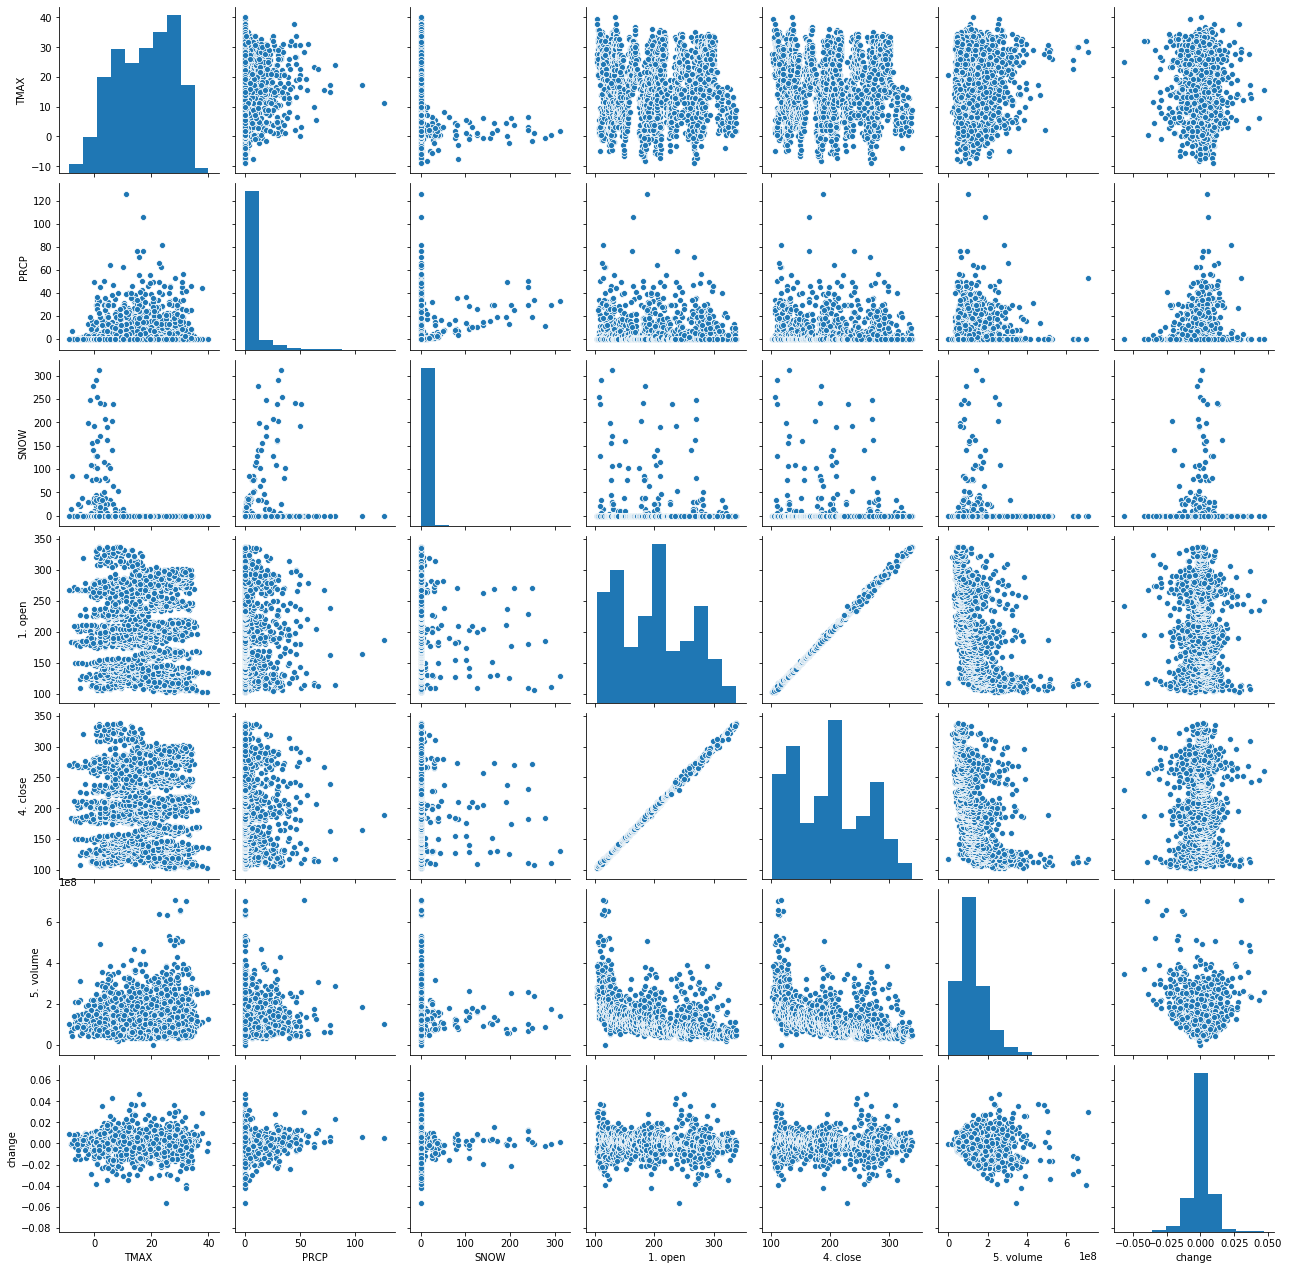

In [33]:
import seaborn as sns
sns.pairplot(newyorkdata)

In [34]:
newyorkdata.corr() #to see if weather correlates with the data 

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,-0.014297,-0.195119,-0.036332,-0.036844,0.018559,-0.022001
PRCP,-0.014297,1.000000,0.235563,-0.013208,-0.012143,0.032106,0.054745
SNOW,-0.195119,0.235563,1.000000,-0.033712,-0.033649,0.007750,0.006075
1. open,-0.036332,-0.013208,-0.033712,1.000000,0.999664,-0.555188,-0.019346
4. close,-0.036844,-0.012143,-0.033649,0.999664,1.000000,-0.558170,0.005185
5. volume,0.018559,0.032106,0.007750,-0.555188,-0.558170,1.000000,-0.129333
change,-0.022001,0.054745,0.006075,-0.019346,0.005185,-0.129333,1.000000


Correlation analysis shows that volume and max temp could be inversley correlated and total open,high,low and close all have a postive correlation.

In [35]:
#Want to explore if LA has an impact on the SPY
ladata = datasetone[datasetone['NAME'] == 'LOS ANGELES INTERNATIONAL AIRPORT, CA US']
ladata['change'] = (ladata['4. close']- ladata['1. open'])/ladata['1. open']

C:\Users\harri\anaconda3.00\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


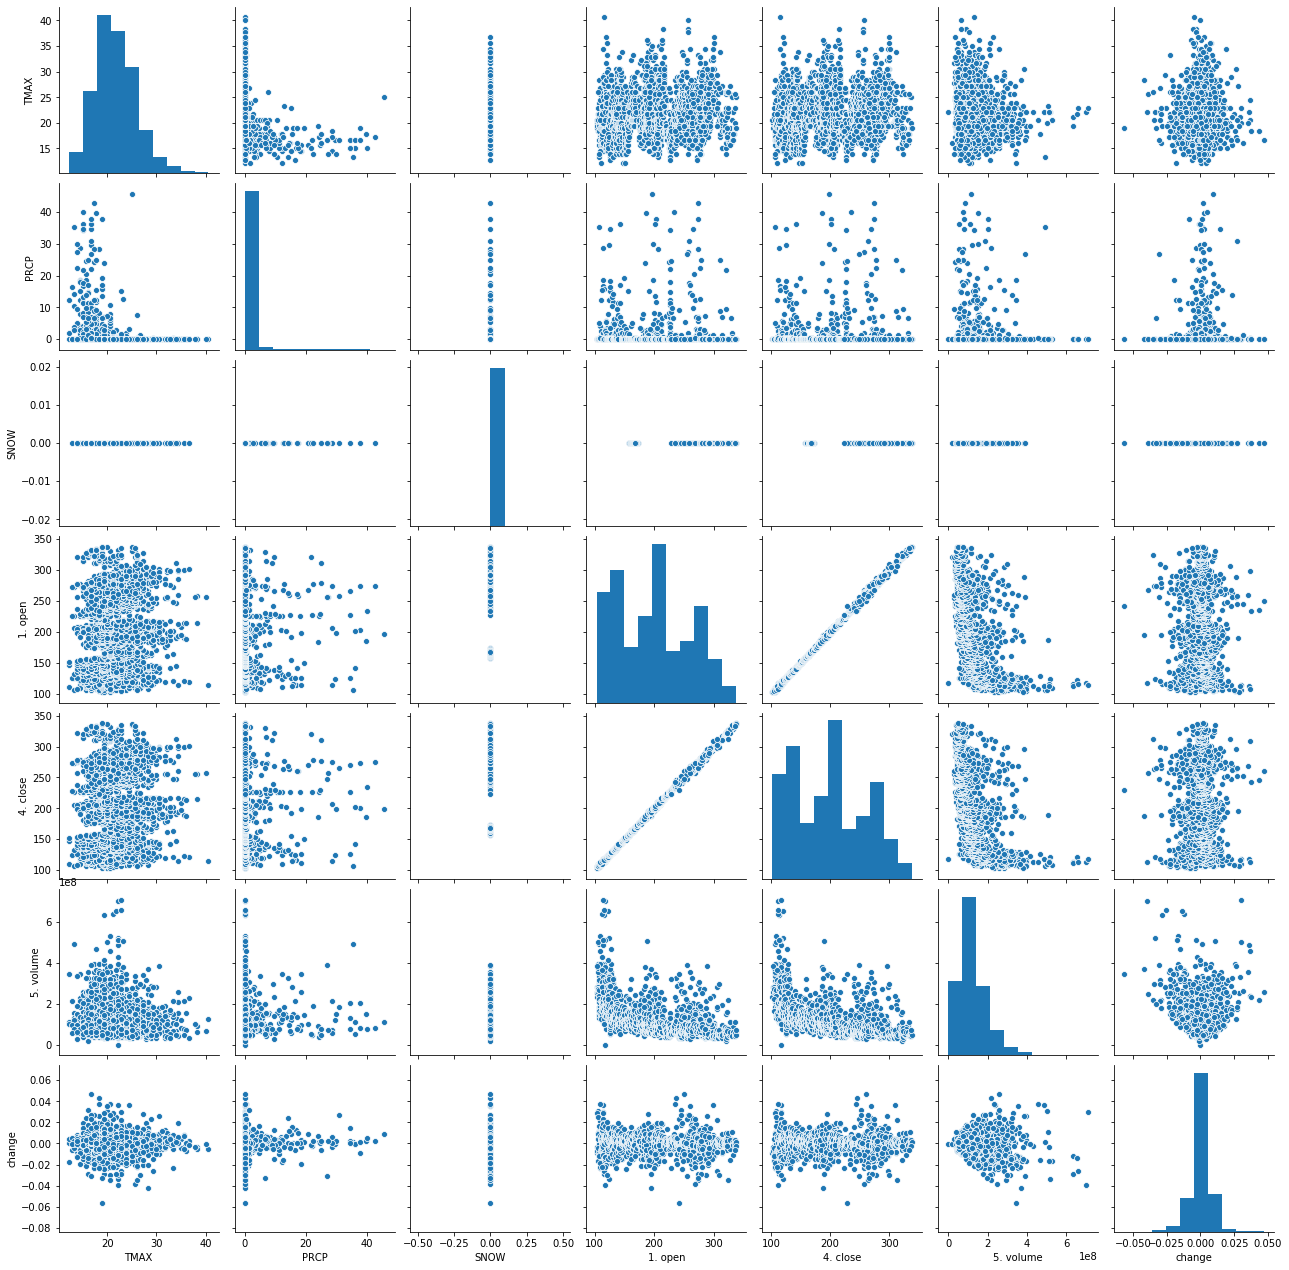

In [36]:
import seaborn as sns
sns.pairplot(ladata)

In [37]:
ladata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,-0.232043,NaN,0.148518,0.147852,-0.144085,-0.015053
PRCP,-0.232043,1.000000,NaN,0.010803,0.011713,0.020676,0.028818
SNOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. open,0.148518,0.010803,NaN,1.000000,0.999664,-0.555188,-0.019346
4. close,0.147852,0.011713,NaN,0.999664,1.000000,-0.558170,0.005185
5. volume,-0.144085,0.020676,NaN,-0.555188,-0.558170,1.000000,-0.129333
change,-0.015053,0.028818,NaN,-0.019346,0.005185,-0.129333,1.000000


In [38]:
newyorkdata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,-0.014297,-0.195119,-0.036332,-0.036844,0.018559,-0.022001
PRCP,-0.014297,1.000000,0.235563,-0.013208,-0.012143,0.032106,0.054745
SNOW,-0.195119,0.235563,1.000000,-0.033712,-0.033649,0.007750,0.006075
1. open,-0.036332,-0.013208,-0.033712,1.000000,0.999664,-0.555188,-0.019346
4. close,-0.036844,-0.012143,-0.033649,0.999664,1.000000,-0.558170,0.005185
5. volume,0.018559,0.032106,0.007750,-0.555188,-0.558170,1.000000,-0.129333
change,-0.022001,0.054745,0.006075,-0.019346,0.005185,-0.129333,1.000000


#When comparing LA to New York, there seems to be a higher inverse correlation between the change in the SPY price with the TMax and a postive correlation with percepition.

In [39]:
#lOOK AT Toronto and how the Candaian etf XIU performs when comapred to the weather
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=xiu.to&outputsize=full&apikey=KU0Z8259JAVSYO4P'
responsetsx= requests.get(url) 
responsetsx.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'xiu.to',
  '3. Last Refreshed': '2020-05-12',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-05-12': {'1. open': '23.2600',
   '2. high': '23.3200',
   '3. low': '22.8400',
   '4. close': '22.8400',
   '5. volume': '4511284'},
  '2020-05-11': {'1. open': '22.7800',
   '2. high': '23.2300',
   '3. low': '22.7700',
   '4. close': '23.1900',
   '5. volume': '2685500'},
  '2020-05-08': {'1. open': '22.9100',
   '2. high': '22.9400',
   '3. low': '22.8100',
   '4. close': '22.9100',
   '5. volume': '3343400'},
  '2020-05-07': {'1. open': '22.9100',
   '2. high': '23.0300',
   '3. low': '22.6800',
   '4. close': '22.7100',
   '5. volume': '2443600'},
  '2020-05-06': {'1. open': '22.7900',
   '2. high': '22.8500',
   '3. low': '22.6100',
   '4. close': '22.7300',
   '5. volume': '3611300'},
  '2020-05-05': {'1. open': '22.8300',
   '2. high': 

In [40]:
# opening a file to save the TSX XIU data to 
import pickle
with open('TSX','wb') as f:
    pickle.dump(responsetsx,f)

In [41]:
#open TSXXIU file that saved above 
with open('TSX','rb') as f:
    response = pickle.load(f)

In [42]:
#import stockdata into a data frame
tsxdata = pd.DataFrame(responsetsx.json()['Time Series (Daily)']).transpose()

In [43]:
tsxdata.head()

,1. open,2. high,3. low,4. close,5. volume
2020-05-12,23.2600,23.3200,22.8400,22.8400,4511284
2020-05-11,22.7800,23.2300,22.7700,23.1900,2685500
2020-05-08,22.9100,22.9400,22.8100,22.9100,3343400
2020-05-07,22.9100,23.0300,22.6800,22.7100,2443600
2020-05-06,22.7900,22.8500,22.6100,22.7300,3611300


In [44]:
tsxdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5024 entries, 2020-05-12 to 2000-05-12
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    5024 non-null   object
 1   2. high    5024 non-null   object
 2   3. low     5024 non-null   object
 3   4. close   5024 non-null   object
 4   5. volume  5024 non-null   object
dtypes: object(5)
memory usage: 235.5+ KB


In [45]:
#to change to numeric use the to_numeric function and specify each column
tsxdata['1. open'] = pd.to_numeric(tsxdata['1. open'])
tsxdata['2. high'] = pd.to_numeric(tsxdata['2. high'])
tsxdata['3. low'] = pd.to_numeric(tsxdata['3. low'])
tsxdata['4. close'] = pd.to_numeric(tsxdata['4. close'])
tsxdata['5. volume'] = pd.to_numeric(tsxdata['5. volume'])

In [46]:
#Move date to a column
tsxdata = tsxdata.reset_index()
#change the index name to date
tsxdata = tsxdata.rename(columns = {'index':'DATE'})
#make the date into date data
tsxdata['DATE'] = pd.to_datetime(stockdata['DATE'])

In [47]:
tsxdata.head()

,DATE,1. open,2. high,3. low,4. close,5. volume
0,2020-05-12,23.26,23.32,22.84,22.84,4511284
1,2020-05-11,22.78,23.23,22.77,23.19,2685500
2,2020-05-08,22.91,22.94,22.81,22.91,3343400
3,2020-05-07,22.91,23.03,22.68,22.71,2443600
4,2020-05-06,22.79,22.85,22.61,22.73,3611300


In [48]:
tsxmergedata = weather.merge(tsxdata, on = 'DATE')

In [49]:
tsxmergedata.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT17,WT18,WT19,WT21,WT22,1. open,2. high,3. low,4. close,5. volume
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-04,4.8,249.0,1722.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,17.23,17.30,17.18,17.21,12002100
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2010-01-04,2.7,1358.0,1209.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.23,17.30,17.18,17.21,12002100
2,UKM00003772,"HEATHROW, UK",2010-01-04,NaN,NaN,NaN,0.0,NaN,NaN,-2.8,...,NaN,NaN,NaN,NaN,NaN,17.23,17.30,17.18,17.21,12002100
3,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",2010-01-04,NaN,NaN,NaN,0.4,8.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,17.23,17.30,17.18,17.21,12002100
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2010-01-05,4.4,2206.0,1047.0,0.0,0.0,0.0,NaN,...,NaN,1.0,NaN,NaN,NaN,17.20,17.34,17.15,17.34,7781200


In [50]:
datasettsx = tsxmergedata[['DATE', 'NAME','TMAX', 'PRCP','SNOW','1. open','4. close','5. volume']]

In [51]:
torontodata = datasettsx[datasettsx['NAME'] == 'TORONTO LESTER B. PEARSON INT, ON CA']
torontodata['change'] = (torontodata['4. close']- torontodata['1. open'])/torontodata['1. open']

C:\Users\harri\anaconda3.00\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
torontodata.head(100)

,DATE,NAME,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
3,2010-01-04,"TORONTO LESTER B. PEARSON INT, ON CA",-7.1,0.4,8.0,17.23,17.21,12002100,-0.001161
7,2010-01-05,"TORONTO LESTER B. PEARSON INT, ON CA",-3.6,2.0,30.0,17.20,17.34,7781200,0.008140
11,2010-01-06,"TORONTO LESTER B. PEARSON INT, ON CA",-2.1,0.0,0.0,17.35,17.35,10165800,0.000000
15,2010-01-07,"TORONTO LESTER B. PEARSON INT, ON CA",-3.0,0.0,0.0,17.25,17.37,13397700,0.006957
19,2010-01-08,"TORONTO LESTER B. PEARSON INT, ON CA",-7.3,0.8,14.0,17.40,17.32,5459400,-0.004598
...,...,...,...,...,...,...,...,...,...
383,2010-05-20,"TORONTO LESTER B. PEARSON INT, ON CA",28.7,0.0,0.0,17.81,17.65,14304200,-0.008984
387,2010-05-21,"TORONTO LESTER B. PEARSON INT, ON CA",21.3,0.0,0.0,17.59,17.70,16040800,0.006254
391,2010-05-24,"TORONTO LESTER B. PEARSON INT, ON CA",27.2,0.0,0.0,17.88,18.01,12377600,0.007271
395,2010-05-25,"TORONTO LESTER B. PEARSON INT, ON CA",28.8,0.0,0.0,17.95,17.86,11105500,-0.005014


In [53]:
torontodata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,0.033266,-0.261291,-0.279655,-0.282123,0.088548,-0.011952
PRCP,0.033266,1.000000,0.196876,-0.027385,-0.029600,-0.014383,-0.016569
SNOW,-0.261291,0.196876,1.000000,0.081763,0.082771,-0.053940,0.004412
1. open,-0.279655,-0.027385,0.081763,1.000000,0.991394,0.044695,-0.079338
4. close,-0.282123,-0.029600,0.082771,0.991394,1.000000,0.042234,0.051626
5. volume,0.088548,-0.014383,-0.053940,0.044695,0.042234,1.000000,-0.015297
change,-0.011952,-0.016569,0.004412,-0.079338,0.051626,-0.015297,1.000000


In [54]:
newyorkdata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,-0.014297,-0.195119,-0.036332,-0.036844,0.018559,-0.022001
PRCP,-0.014297,1.000000,0.235563,-0.013208,-0.012143,0.032106,0.054745
SNOW,-0.195119,0.235563,1.000000,-0.033712,-0.033649,0.007750,0.006075
1. open,-0.036332,-0.013208,-0.033712,1.000000,0.999664,-0.555188,-0.019346
4. close,-0.036844,-0.012143,-0.033649,0.999664,1.000000,-0.558170,0.005185
5. volume,0.018559,0.032106,0.007750,-0.555188,-0.558170,1.000000,-0.129333
change,-0.022001,0.054745,0.006075,-0.019346,0.005185,-0.129333,1.000000


In [55]:
ladata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume,change
TMAX,1.000000,-0.232043,NaN,0.148518,0.147852,-0.144085,-0.015053
PRCP,-0.232043,1.000000,NaN,0.010803,0.011713,0.020676,0.028818
SNOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. open,0.148518,0.010803,NaN,1.000000,0.999664,-0.555188,-0.019346
4. close,0.147852,0.011713,NaN,0.999664,1.000000,-0.558170,0.005185
5. volume,-0.144085,0.020676,NaN,-0.555188,-0.558170,1.000000,-0.129333
change,-0.015053,0.028818,NaN,-0.019346,0.005185,-0.129333,1.000000


There seems to be an insignificant correlation between the weather and the stock market perfomance. East coast cities such as Toronto and New york seem to be closer in correlation then the west coast.

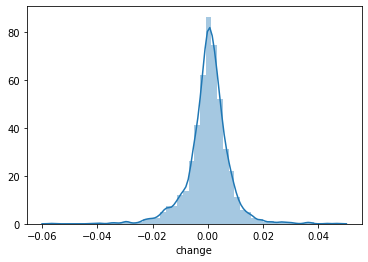

In [153]:
sns.distplot(newyorkdata['change']) #to see what is the distribution of the data 

In [57]:
#want to see if a U.S. GAS ETF is correlated to the weather
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=UNG&outputsize=full&apikey=KU0Z8259JAVSYO4P'
responseGAS= requests.get(url) 
responseGAS.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'UNG',
  '3. Last Refreshed': '2020-05-12',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-05-12': {'1. open': '12.3600',
   '2. high': '12.4600',
   '3. low': '11.8000',
   '4. close': '11.8000',
   '5. volume': '8940017'},
  '2020-05-11': {'1. open': '12.9700',
   '2. high': '13.0700',
   '3. low': '12.4800',
   '4. close': '12.7900',
   '5. volume': '5183419'},
  '2020-05-08': {'1. open': '12.7600',
   '2. high': '12.9700',
   '3. low': '12.5400',
   '4. close': '12.6400',
   '5. volume': '6054228'},
  '2020-05-07': {'1. open': '13.5600',
   '2. high': '13.7100',
   '3. low': '13.0500',
   '4. close': '13.1600',
   '5. volume': '6385555'},
  '2020-05-06': {'1. open': '13.9300',
   '2. high': '13.9300',
   '3. low': '13.3500',
   '4. close': '13.4900',
   '5. volume': '6316279'},
  '2020-05-05': {'1. open': '14.5800',
   '2. high': '14

In [58]:
# opening a file to save the TSX XIU data to 
import pickle
with open('GAS','wb') as f:
    pickle.dump(responseGAS,f)
#open TSXXIU file that saved above 
with open('GAS','rb') as f:
    responseGAS = pickle.load(f)
#import stockdata into a data frame
gasdata = pd.DataFrame(responseGAS.json()['Time Series (Daily)']).transpose()

In [59]:
#to change to numeric use the to_numeric function and specify each column
gasdata['1. open'] = pd.to_numeric(gasdata['1. open'])
gasdata['2. high'] = pd.to_numeric(gasdata['2. high'])
gasdata['3. low'] = pd.to_numeric(gasdata['3. low'])
gasdata['4. close'] = pd.to_numeric(gasdata['4. close'])
gasdata['5. volume'] = pd.to_numeric(gasdata['5. volume'])

In [60]:
#Move date to a column
gasdata = gasdata.reset_index()
#change the index name to date
gasdata = gasdata.rename(columns = {'index':'DATE'})
#make the date into date data
gasdata['DATE'] = pd.to_datetime(stockdata['DATE'])

In [61]:
gasmergedata = weather.merge(gasdata, on = 'DATE')

In [62]:
datasetgas = gasmergedata[['DATE', 'NAME','TMAX', 'PRCP','SNOW','1. open','4. close','5. volume']]

In [63]:
newyorkgasdata = datasetgas[datasetgas['NAME'] == 'NY CITY CENTRAL PARK, NY US']

In [130]:
newyorkgasdata.first()

TypeError: first() missing 1 required positional argument: 'offset'

In [64]:
newyorkgasdata.corr()

,TMAX,PRCP,SNOW,1. open,4. close,5. volume
TMAX,1.000000,-0.014297,-0.195119,-0.031037,-0.031214,-0.204551
PRCP,-0.014297,1.000000,0.235563,0.030707,0.030220,-0.012331
SNOW,-0.195119,0.235563,1.000000,-0.006466,-0.008265,0.070439
1. open,-0.031037,0.030707,-0.006466,1.000000,0.999118,-0.424869
4. close,-0.031214,0.030220,-0.008265,0.999118,1.000000,-0.423937
5. volume,-0.204551,-0.012331,0.070439,-0.424869,-0.423937,1.000000


When looking at how gas etf data perfoms it seems that there is a higher inverse correlation with volume and and temperature. This means that if it is colder outside that the etf will have more volume and if its warmer will have less volume

#Want to group the data by month to see if there is a correlation with gas prices
#create a column by month
newyorkgasdata.head()

In [89]:
newyorkgasdata.std()

TMAX         1.011300e+01
PRCP         9.509947e+00
SNOW         2.026863e+01
1. open      7.062982e+00
4. close     7.073849e+00
5. volume    8.978966e+06
dtype: float64

In [65]:
gasdatamonth = newyorkgasdata.set_index('DATE', True)

In [66]:
gasdatamonth.head()

,NAME,TMAX,PRCP,SNOW,1. open,4. close,5. volume
DATE,,,,,,,
2010-01-04,"NY CITY CENTRAL PARK, NY US",-1.1,0.0,0.0,10.5600,10.641,23726660
2010-01-05,"NY CITY CENTRAL PARK, NY US",-1.1,0.0,0.0,10.5400,10.320,22966428
2010-01-06,"NY CITY CENTRAL PARK, NY US",1.1,0.0,0.0,10.5896,10.830,40484686
2010-01-07,"NY CITY CENTRAL PARK, NY US",2.8,0.0,0.0,10.7300,10.610,41882719
2010-01-08,"NY CITY CENTRAL PARK, NY US",0.6,1.3,15.0,10.3000,10.410,27914309


In [155]:
gasdatamonth.mean() #the yearly temp balances itselfout so cant find a mean based on 

TMAX         1.740735e+01
PRCP         3.672489e+00
SNOW         2.565050e+00
1. open      1.496183e+01
4. close     1.495882e+01
5. volume    9.967574e+06
dtype: float64

In [67]:
gasmetrics = gasdatamonth.groupby(pd.Grouper(freq="M")).describe()

In [154]:
gasmetricscorr = gasmetrics.corr()

In [69]:
gasmetricscorr.to_csv('gasmetricscorr.csv')
#Data did not all fit in Jupyternotebook and saw a correlation between STDEV of price and temeprature and
#temperature and STDEV of volume aslo correlated

In [71]:
gasmetrics_ny_monthy_std= gasdatamonth.groupby(pd.Grouper(freq="M")).std() #thex axis
gasmetrics_ny_monthy_mean= gasdatamonth.groupby(pd.Grouper(freq="M")).mean() #the y axis 

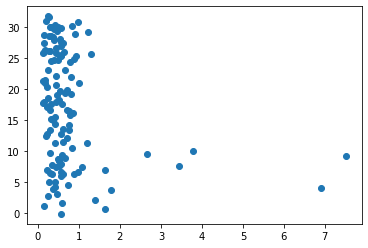

In [72]:
plt.scatter(gasmetrics_ny_monthy_std['1. open'],gasmetrics_ny_monthy_mean['TMAX'])

Based on this graph highest voltailtiy days were on low temperature day

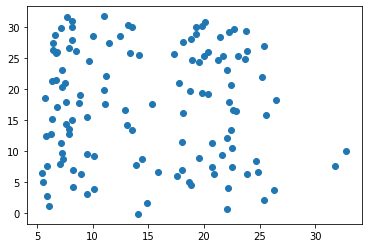

In [73]:
plt.scatter(gasmetrics_ny_monthy_mean['1. open'],gasmetrics_ny_monthy_mean['TMAX'])

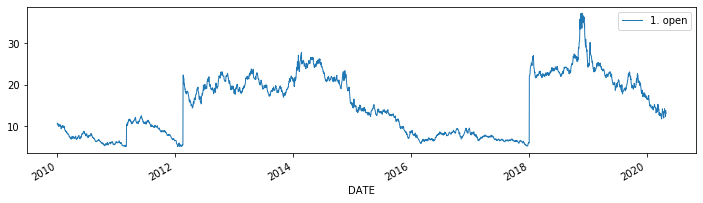

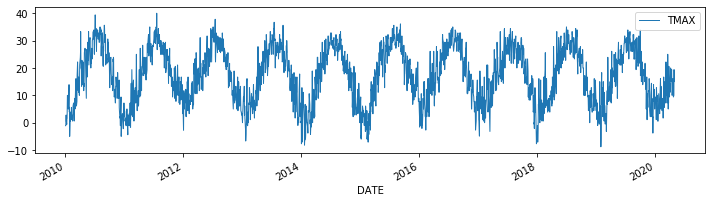

In [87]:
newyorkgasdata.plot.line(x='DATE',y='1. open',figsize=(12,3),lw=1)
newyorkgasdata.plot.line(x='DATE',y='TMAX',figsize=(12,3),lw=1)
#Graph to see how price and temp look with one another 
#Peaks could be similar

Based on looking at the means of both open price and temperature there is no visiual realtionship in the data

From the current analysis there is a possible realtionship between the gas etf and the weather. To understand how this would work for a trading strategy the below is a hypothetical analsysis of what could happen:

In [122]:
class backtest:
    def __init__(self, cash_balance):
        self.cash_balance = cash_balance
        self.investment_value = 0 
        self.number_of_shares = 0
        
    
    def buy(self,price,number_of_shares):     #this function is for buying securities  
        transaction_cost = price * number_of_shares
        if self.cash_balance - (price * number_of_shares) <= 0:
            pass
        else:   
            self.cash_balance = self.cash_balance - transaction_cost
            self.investment_value = self.investment_value + (price * number_of_shares)
            self.number_of_shares = self.number_of_shares + number_of_shares
        
    def sell(self,price,number_of_shares):     #this function is for selling securities  
        transaction_cost = price * number_of_shares
        if self.number_of_shares <= number_of_shares:
            pass
        else: 
            self.cash_balance = self.cash_balance + transaction_cost
            self.investment_value = self.investment_value - (price * number_of_shares)
            self.number_of_shares = self.number_of_shares - number_of_shares

In [128]:
#Test if buy when temp <5 and sell when greater then 15
gasetf = backtest(1000)
for index, row in newyorkgasdata.iterrows():    #This will loop through date and print the price and the date 
    if row['TMAX'] <= 5:
        gasetf.buy(row['1. open'], 1)
    if row['TMAX'] >= 15:
        gasetf.sell(row['1. open'], 1)
print(gasetf.number_of_shares * row['1. open'])
print(gasetf.cash_balance)

65.19999999999999
1256.6851000000006


In [152]:
#Test if buy when temp >15 and sell when less then 5
gasetf = backtest(1000)
for index, row in newyorkgasdata.iterrows():    #This will loop through date and print the price and the date 
    if row['TMAX'] >= 15:
        gasetf.buy(row['1. open'], 1)
    if row['TMAX'] <= 5:
        gasetf.sell(row['1. open'], 1)
print(gasetf.number_of_shares * row['1. open'])
print(gasetf.cash_balance)

1408.32
133.86000000000044


If you did a buy and hold strategy what would it be?

In [151]:
(float(newyorkgasdata.tail(1)['1. open']) - float(newyorkgasdata.head(1)['1. open'])) * 1000

2479.9999999999986

When looking at using temperature as a buying strategy the analysis suggests that if you buy based on temperature metrics you would have not made as much money as buying once and holding until the last date